In [4]:
# %load ../loaders/imports.py
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb

sys.path.append('..')

from utils import gen_covariance, gen_beta2, gen_data, get_cov_list
from utils import selection_accuracy, estimation_error
from sklearn.linear_model import LassoLars, lasso_path, LinearRegression

from pyuoi.linear_model import UoI_Lasso
#from pyuoi.linear_model import cassolasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
# %load ../loaders/datgen.py
n_features = 50
n_samples = 200

sigma = gen_covariance(n_features, 0.25, 100, 1, 0)
beta = gen_beta2(n_features, n_features, sparsity = 0.2, betawidth = np.inf)
X, X_test, y, y_test, ss = gen_data(n_samples, n_features, kappa = 100, 
									covariance = sigma, beta = beta)

X = StandardScaler().fit_transform(X)
y -= np.mean(y)

In [3]:
uoi1 = UoI_Lasso()
uoi2 = cassolasso.UoI_Lasso()

In [4]:
# Time execution
# %time uoi1.fit(X, y.ravel())

In [5]:
# %time uoi2.fit(X, y.ravel())

In [6]:
# Assess similarity of results
random_state =  1234
uoi1 = UoI_Lasso(fit_intercept = False, random_state = random_state)
uoi2 = cassolasso.UoI_Lasso(fit_intercept = False, random_state = random_state)

uoi1.fit(X, y)
uoi2.fit(X, y)

KeyboardInterrupt: 

In [ ]:
selection_accuracy(beta.ravel(), uoi1.coef_)

In [ ]:
selection_accuracy(beta.ravel(), uoi2.coef_)

In [ ]:
estimation_error(beta.ravel(), uoi1.coef_)

In [ ]:
estimation_error(beta.ravel(), uoi2.coef_)

Test the equivalent modifications on UoI Elastic Net

In [ ]:
def GCV(X, y, l):
    n, n_features = X.shape
    H = X @ np.linalg.inv(X.T @ X + l * np.eye(n_features)) @ X.T
    mu = H @ y
    gcv = 1/n * np.linalg.norm(y.ravel() - mu.ravel())**2/(1 - 1/n * np.trace(H))**2
    return gcv

In [ ]:
# Examine the nature of the GCV ridge regularization function
l = np.linspace(0, 50, 500)
gcv = np.array([GCV(X, y, l_) for l_ in l])

In [ ]:
plt.plot(gcv)

In [ ]:
# Compare with what we get from RidgeCV
from sklearn.linear_model import RidgeCV, ElasticNetCV

In [ ]:
r = RidgeCV(alphas = np.linspace(0.01, 1000, 200), fit_intercept = False)
r.fit(X, y.ravel())

In [ ]:
r.alpha_

In [ ]:
np.linspace(0, 10, 100)[np.argmin(gcv)]

In [ ]:
# How about vs. ElasticNetCV?
e = ElasticNetCV(l1_ratio = [0.1, 0.5, 0.75, 0.9, 0.95, 0.99], fit_intercept = False, cv = 5)
e.fit(X, y.ravel())

In [ ]:
from sklearn.linear_model.coordinate_descent import _alpha_grid

In [ ]:
l1 = _alpha_grid(X, y, l1_ratio = 0.99)

In [ ]:
l2 = (1 - 0.1) * l1/2

In [ ]:
l2

In [4]:
from pyuoi.linear_model import UoI_ElasticNet
from pyuoi.linear_model import casso_en

In [5]:
uoi1 = casso_en.UoI_ElasticNet()

In [ ]:
%time uoi1.fit(X, y.ravel())

In [7]:
import pycasso
from sklearn.linear_model.coordinate_descent import _alpha_grid

In [78]:
# Figure : Compare the max selection accuracy along solution paths for Lasso and MCP for various concavity 
# parameters

# First : No correlated design

n_features = 50
ns = 200
sparsity = np.linspace(0.05, 1, 11)

n_alphas = 48

# Covariance of design matrix
sigma = gen_covariance(n_features, 0, 5, 5, 1)

gamma = np.array([1.01, 3, 10, 30])
gamma_SCAD = np.array([2.1, 5, 10, 30])

lasso_sa = np.zeros((sparsity.size))
mcp_sa = np.zeros((sparsity.size, gamma.size))
scad_sa = np.zeros((sparsity.size, gamma.size))

for i, s in enumerate(sparsity):
    t0 = time.time()
    beta = gen_beta2(n_features, n_features, sparsity = s, betawidth = np.inf)
    X, X_test, y, y_test, ss = gen_data(ns, n_features, kappa = 10, 
                                        covariance = sigma, beta = beta)
    
    X = StandardScaler().fit_transform(X)
    y -= np.mean(y)
    
    alphas = _alpha_grid(X, y, n_alphas = n_alphas)
    s_lasso = pycasso.Solver(X, y, family = 'gaussian', useintercept = False, 
                             lambdas = alphas, penalty = 'l1')
    s_lasso.train()
    
    lasso_sa[i] = np.max(selection_accuracy(beta.ravel(), s_lasso.result['beta']))
    
    for j, g in enumerate(gamma):
        s_mcp = pycasso.Solver(X, y, family = 'gaussian', useintercept = False, 
                               gamma = g, penalty = 'mcp')
        s_mcp.train()
        mcp_sa[i, j] = np.max(selection_accuracy(beta.ravel(), s_mcp.result['beta']))

        s_scad = pycasso.Solver(X, y, family = 'gaussian', useintercept = False, 
                               gamma = gamma_SCAD[j], penalty = 'scad')
        s_scad.train()
        scad_sa[i, j] = np.max(selection_accuracy(beta.ravel(), s_scad.result['beta']))

 

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training i

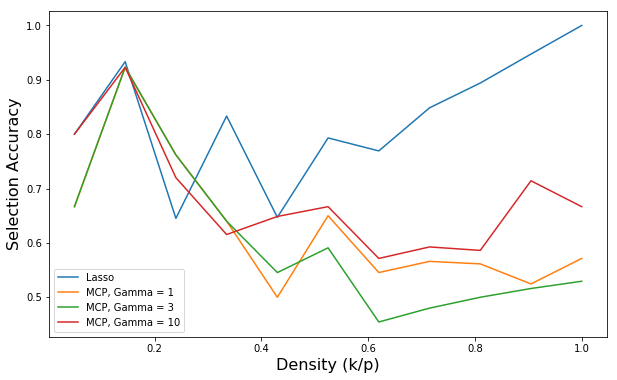

In [84]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(sparsity, lasso_sa)
ax.plot(sparsity, mcp_sa[:, 0])
ax.plot(sparsity, mcp_sa[:, 1])
ax.plot(sparsity, mcp_sa[:, 2])

ax.set_ylabel('Selection Accuracy', fontsize = 16)
ax.set_xlabel('Density (k/p)', fontsize = 16)
ax.legend(['Lasso', 'MCP, Gamma = 1', 'MCP, Gamma = 3', 'MCP, Gamma = 10', 'MCP, Gamma = 30'])
# plt.savefig('LassovMCPCase2.png', bbox_inches = 'tight', pad_inches = 0)

In [ ]:
# Move on to adaptive lasso-type regularizations.

In [43]:
from sklearn.linear_model import RidgeCV

In [55]:
from sklearn.linear_model import ElasticNet

In [70]:
# Figure : Compare the max selection accuracy along solution paths for Lasso and MCP for various concavity 
# parameters

n_features = 50
ns = 200
sparsity = np.linspace(0.05, 1, 11)

n_alphas = 48

# Covariance of design matrix
sigma = gen_covariance(n_features, 0.33, 5, 5, 0)

# Precision matrix
D = np.linalg.inv(sigma)
dd = np.diag(D)

lasso_sa = np.zeros((sparsity.size))
alasso_sa = np.zeros((sparsity.size))
spac_sa = np.zeros((sparsity.size))
en_sa = np.zeros((sparsity.size))

for i, s in enumerate(sparsity):
    t0 = time.time()
    beta = gen_beta2(n_features, n_features, sparsity = s, betawidth = np.inf)
    X, X_test, y, y_test, ss = gen_data(ns, n_features, kappa = 5, 
                                        covariance = sigma, beta = beta)
    
    X = StandardScaler().fit_transform(X)
    y -= np.mean(y)
    
    alphas = _alpha_grid(X, y, n_alphas = n_alphas)
    s_lasso = pycasso.Solver(X, y, family = 'gaussian', useintercept = False, 
                             lambdas = alphas, penalty = 'l1')
    s_lasso.train()
    
    lasso_sa[i] = np.max(selection_accuracy(beta.ravel(), s_lasso.result['beta']))
    
    # For adaptive lasso, initialize estimates with CV Ridge fit
    #r = RidgeCV(fit_intercept = False)
    r = LinearRegression(fit_intercept = False)
    r.fit(X, y)

    # Reweight the design matrix using the ridge coefficients
    xx = np.multiply(X, np.abs(r.coef_.ravel()))

    s_alasso = pycasso.Solver(xx, y, family = 'gaussian', useintercept = False, 
                              penalty = 'l1')
    
    s_alasso.train()
    alasso_sa[i] = np.max(selection_accuracy(beta.ravel(), np.multiply(s_alasso.result['beta'],
                                                                    np.abs(r.coef_.ravel()))))
    
    # For SPAC, transform the design matrix using the precision matrix

    xx = np.multiply(X, np.power(dd, 0.5))
    s_spac = pycasso.Solver(xx, y, family = 'gaussian', useintercept = False, penalty = 'l1')
    
    s_spac.train()
    spac_sa[i] = np.max(selection_accuracy(beta.ravel(), np.multiply(s_spac.result['beta'],
                                                                     np.power(dd, -0.5))))
    
    # Solve elastic net along a number of l1_ratio coefficient paths, take the maximum along 
    # all paths:
    l1_ratios = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99]
    en_sa_ = np.zeros((len(l1_ratios), n_alphas))
    for j, l1_ratio in enumerate(l1_ratios):
        alphas = _alpha_grid(X, y, n_alphas = n_alphas, l1_ratio = l1_ratio)
        for k, alpha in enumerate(alphas):
            en = ElasticNet(alpha = alpha, l1_ratio = l1_ratio, fit_intercept = False).fit(X, y)
            en_sa_[j, k] = selection_accuracy(beta.ravel(), en.coef_.ravel())
    en_sa[i] = np.max(en_sa_)
        
        
        

Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.
Training is over.


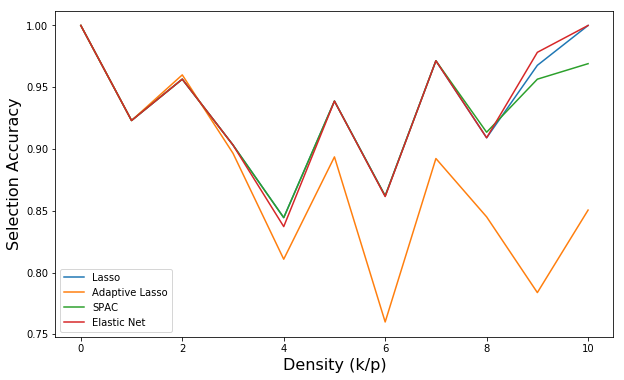

In [71]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.plot(lasso_sa)
ax.plot(alasso_sa)
ax.plot(spac_sa)
ax.plot(en_sa)

ax.set_ylabel('Selection Accuracy', fontsize = 16)
ax.set_xlabel('Density (k/p)', fontsize = 16)
ax.legend(['Lasso', 'Adaptive Lasso', 'SPAC', 'Elastic Net'])
plt.savefig('LassovOthersCase2.png', bbox_inches = 'tight', pad_inches = 0)

In [72]:
# Validate MCP against matlab results
from scipy.io import loadmat

In [79]:
d = loadmat('mcp_coefs.mat')

In [81]:
d['bh'][0, 0].shape

(72, 50)

In [82]:
# Assess selection accuracy on each sparsity
matlab_sa = np.zeros((11, 4))
for i in range(11):
    for j in range(4):
        matlab_sa[i, j] = np.max(selection_accuracy(d['b'][i, :].ravel(), d['bh'][i, j]))

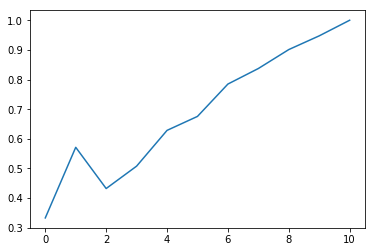

In [87]:
plt.plot(matlab_sa[:, 3])

In [ ]:
# Confirm the matlab L1 solver vs. sklearn